In [34]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [37]:
inter_df = pd.read_csv('Project1Flatiron/UsedData/Inter_Dom.csv').drop(['Unnamed: 0'], axis =1)

In [38]:
inter_df.head(3)

,Country,Date,MovieName,Gross,Gross_change,Releases,Week
0,USA,Apr 26-28,Avengers: Endgame,"$402,212,102",+268.3%,115,17
1,USA,Jul 19-21,The Lion King,"$263,892,161",+107.9%,103,29
2,USA,Nov 27-Dec 1,Frozen II,"$262,286,436",-16.7%,59,47


In [39]:
def clean_gross(df): 
    new_gross = [] 
    for g in np.array(df.Gross): 
        g_array = g.split(',')
        g_array[0] = g_array[0][1:]
        num = float(''.join(g_array))
        new_gross.append(num)
    df.drop(['Gross'], inplace = True, axis =1)
    df['Gross'] = new_gross
    return df
inter_df = clean_gross(inter_df)

### Compare average gross between countries
- average across each movie 

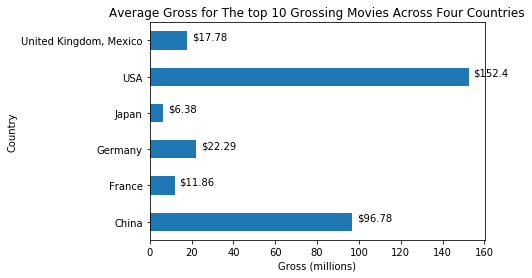

In [40]:
def compare_average(df): 
    cont_group = df.groupby('Country')['Gross'].mean() / 1000000
    a = cont_group.plot.barh()
    for p in a.patches:
        a.annotate(f"${round(p.get_width(), 2)}", (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 10), textcoords='offset points')
    plt.xlabel('Gross (millions)')
    plt.title('Average Gross for The top 10 Grossing Movies Across Four Countries')
    plt.savefig('Project1Flatiron/PlotImages/AverageCountry.png')
    



compare_average(inter_df)

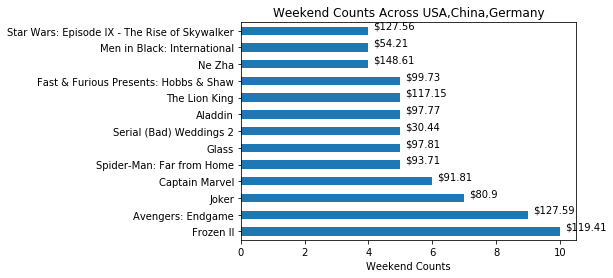

In [42]:
def compare_movie_counts(df):
    cont_group = (df.groupby('Country')['Gross'].sum() / 1000000).sort_values(ascending = False).head(3)
    cont_group = cont_group.index.to_list()
    df = df[df['Country'].isin(cont_group)]
    movie_counts = df.MovieName.value_counts().sort_values(ascending=False).head(13)
    mov_group = (df.groupby('MovieName')['Gross'].mean() / 1000000).sort_values(ascending = False)
    a = movie_counts.plot.barh()
    plt.xlabel('Weekend Counts')
    plt.title(f'Weekend Counts Across {",".join(cont_group)}')
    for p, movie in zip(a.patches, movie_counts.index):
        a.annotate(f"${round(mov_group[movie], 2)}", 
                   (p.get_x() + p.get_width(), p.get_y()-.25), xytext=(5, 10), textcoords='offset points')
    plt.savefig('Project1Flatiron/PlotImages/Inter_Dom_MovieCountsWeekends.png')




        
    


    

compare_movie_counts(inter_df)